# 1. Dataset Overview:
## 1.1. Install libraries

In [38]:
# !pip install -r requirements.txt

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from scipy.stats import t, norm

## 1.2. Load data

In [40]:
# Load data
filepath = '../data/Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(filepath)

In [41]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## 1.3. Clear Data

In this specific analysis, we will focus on the statistical calculation of the columns 'Quality of Sleep' and 'Stress Level' from the dataset.

In [42]:
# Clear data
data_df = data[['Quality of Sleep', 'Stress Level']]

In [43]:
data_df

,Quality of Sleep,Stress Level
0,6,6
1,6,8
2,6,8
3,4,8
4,4,8
...,...,...
369,9,3
370,9,3
371,9,3
372,9,3


# 2. Descriptive Statistics:
## 2.1. Calculate Descriptive Statistics:

In [44]:
# Calculate the variance
variance_df = pd.DataFrame(data_df.var()).transpose()
variance_df.index = ['variance']

# Calculate IQR
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1

IQR_df = pd.DataFrame(IQR).transpose()
IQR_df.index = ['IQR']

# Calculate Range
Range = data_df.max() - data_df.min()
Range_df = pd.DataFrame(Range).transpose()
Range_df.index = ['Range']

descriptive_stat_df = pd.concat([data_df.describe(), variance_df, IQR_df, Range_df])

In [45]:
descriptive_stat_df

,Quality of Sleep,Stress Level
count,374.000000,374.000000
mean,7.312834,5.385027
std,1.196956,1.774526
min,4.000000,3.000000
25%,6.000000,4.000000
50%,7.000000,5.000000
75%,8.000000,7.000000
max,9.000000,8.000000
variance,1.432703,3.148944
IQR,2.000000,3.000000


Then we extract the relevant statistics for further analysis.

In [46]:
def extract_measures(column_name, input_df):
    extracted_stat = input_df[column_name]

    extracted_stat = {
        "count": extracted_stat['count'],
        "mean": extracted_stat['mean'],
        "std": extracted_stat['std'],
        "min": extracted_stat['min'],
        "25%": extracted_stat['25%'],
        "50%": extracted_stat['50%'],
        "75%": extracted_stat['75%'],
        "max": extracted_stat['max'],
        "variance": extracted_stat['variance'],
        "IQR": extracted_stat['IQR'],
        "Range": extracted_stat['Range']
    }
    return extracted_stat

col1_ext = extract_measures('Stress Level', descriptive_stat_df)
col2_ext = extract_measures('Quality of Sleep', descriptive_stat_df)

In [47]:
col1_ext, col2_ext

({'count': 374.0,
  'mean': 5.385026737967914,
  'std': 1.7745264441985167,
  'min': 3.0,
  '25%': 4.0,
  '50%': 5.0,
  '75%': 7.0,
  'max': 8.0,
  'variance': 3.1489441011598314,
  'IQR': 3.0,
  'Range': 5.0},
 {'count': 374.0,
  'mean': 7.31283422459893,
  'std': 1.1969559197336044,
  'min': 4.0,
  '25%': 6.0,
  '50%': 7.0,
  '75%': 8.0,
  'max': 9.0,
  'variance': 1.4327034737853186,
  'IQR': 2.0,
  'Range': 5.0})

## 2.2 Plot diagrams
### 2.2.1 Histogram and Box Plot

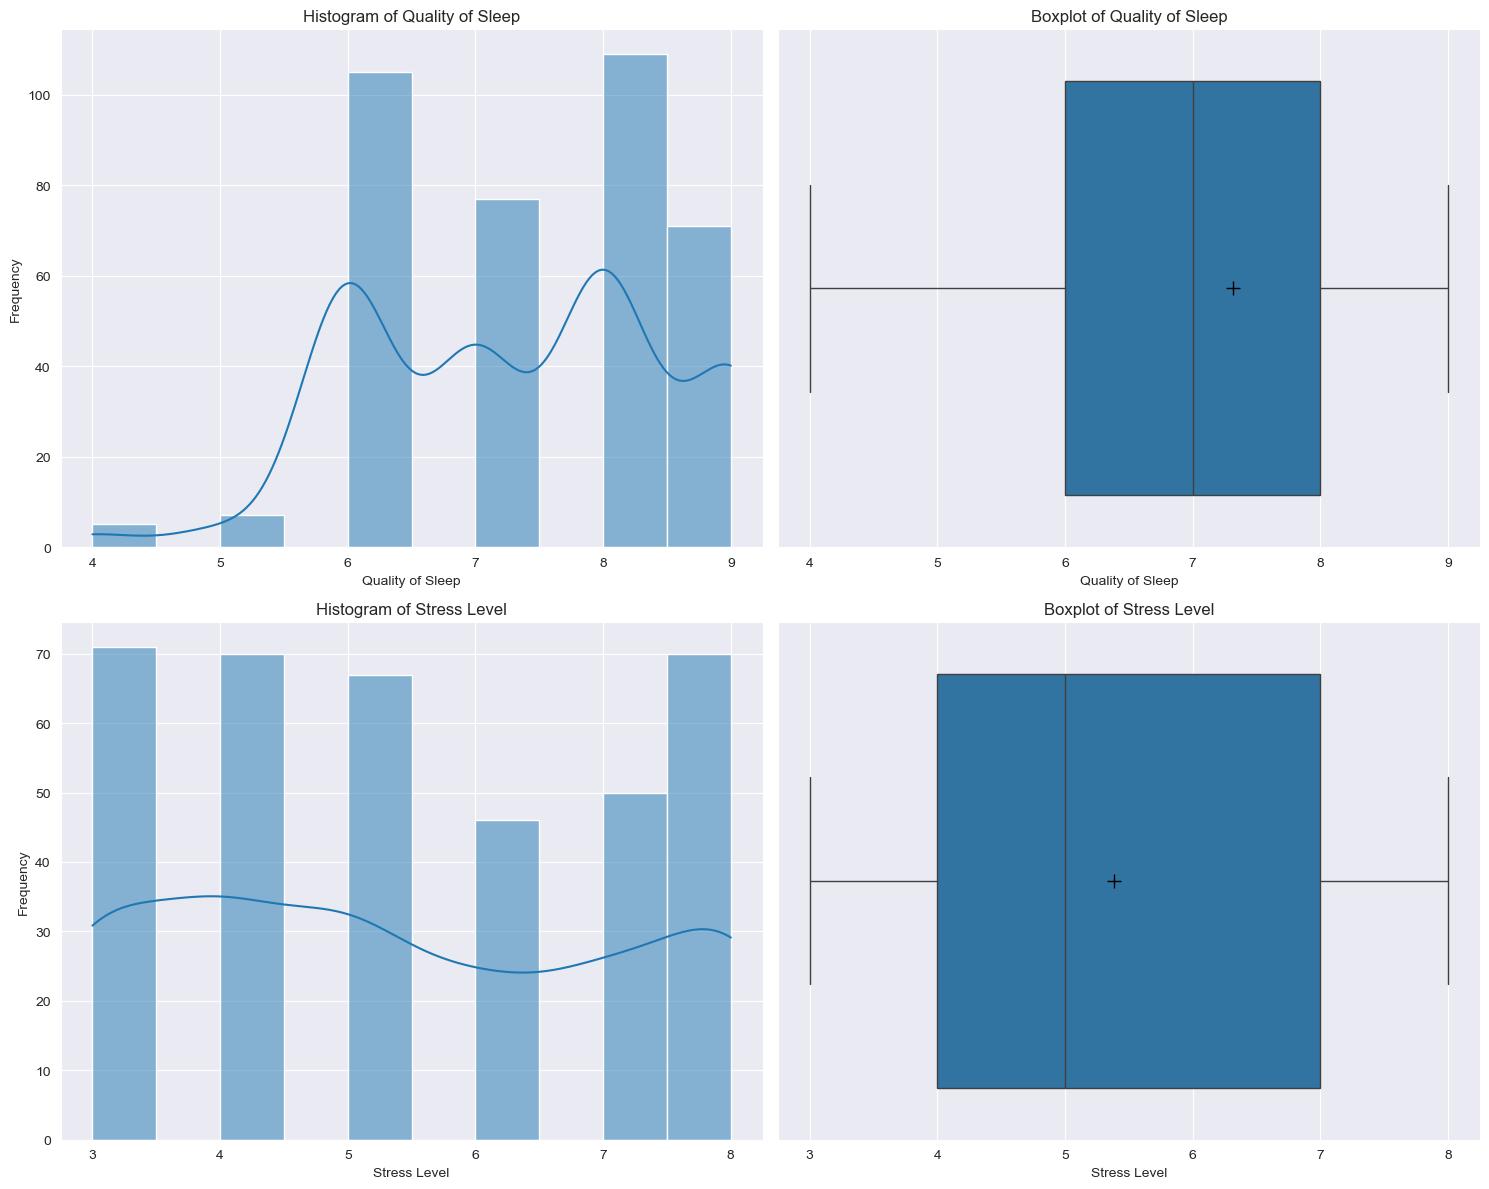

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Histogram and Box Plot for Quality of Sleep
sns.histplot(data_df['Quality of Sleep'], ax=axs[0, 0], kde=True)
axs[0, 0].set_title(f'Histogram of Quality of Sleep')
axs[0, 0].set_xlabel('Quality of Sleep')
axs[0, 0].set_ylabel('Frequency')

sns.boxplot(x=data_df['Quality of Sleep'], ax=axs[0, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[0, 1].set_title(f'Boxplot of Quality of Sleep')
axs[0, 1].set_xlabel('Quality of Sleep')

# Histogram and Box Plot for Stress Level
sns.histplot(data_df['Stress Level'], ax=axs[1, 0], kde=True)
axs[1, 0].set_title(f'Histogram of Stress Level')
axs[1, 0].set_xlabel('Stress Level')
axs[1, 0].set_ylabel('Frequency')

sns.boxplot(x=data_df['Stress Level'], ax=axs[1, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[1, 1].set_title(f'Boxplot of Stress Level')
axs[1, 1].set_xlabel('Stress Level')

# Show Histogram and Box Plot
plt.tight_layout()
plt.show()

### 2.2.2. Plot scatter plot

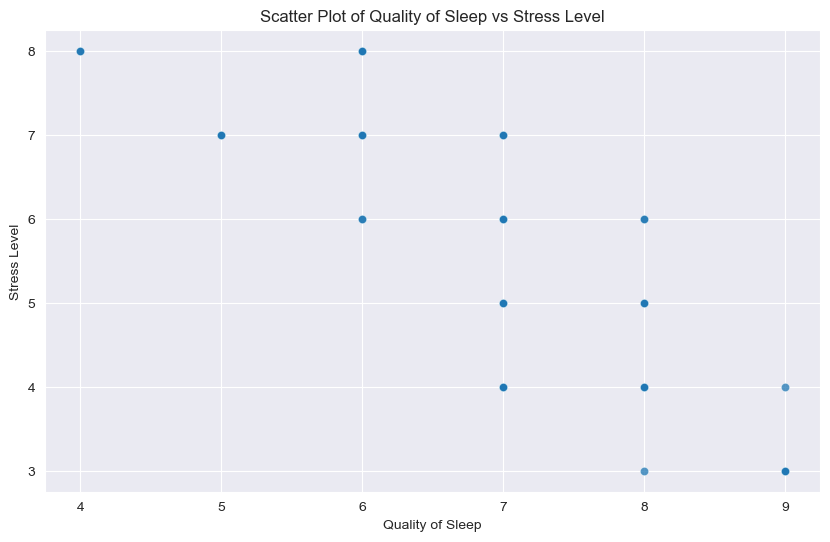

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_df['Quality of Sleep'], y=data_df['Stress Level'], alpha=0.5)

# Adding titles and labels
plt.title(f'Scatter Plot of Quality of Sleep vs Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')

# Show plot
plt.show()

In [50]:
duplicates = data_df.duplicated(subset=['Quality of Sleep', 'Stress Level'])
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 359
